[大图](fa.html), [下载](origin_files/fa.ipynb)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA, FactorAnalysis, FastICA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',na_values='?',
               header=None,index_col=0)#,names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name'])
df=df.loc[:,:5]
df=df.dropna(how='any')
df.head()

1  2  3  4  5
0                     
1000025  5  1  1  1  2
1002945  5  4  4  5  7
1015425  3  1  1  1  2
1016277  6  8  8  1  3
1017023  4  1  1  3  2

## 因子分析

官方文档
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html#sklearn.decomposition.FactorAnalysis

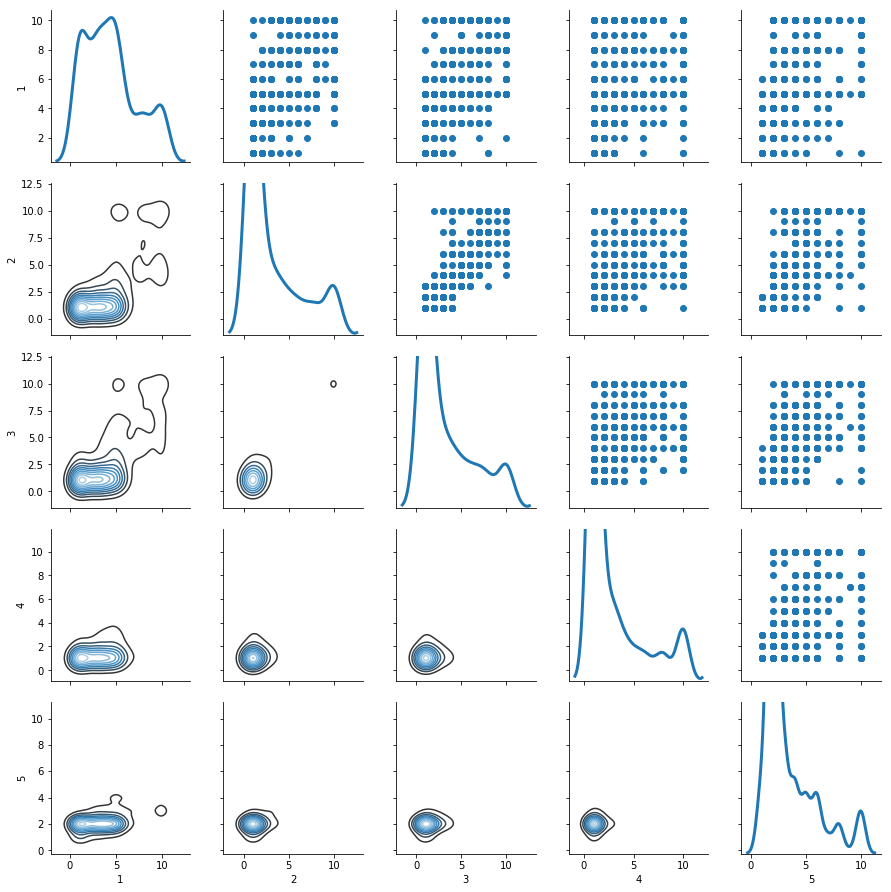

In [3]:
g = sns.PairGrid(df)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False);

In [4]:
df.corr(method='pearson')

1         2         3         4         5
1  1.000000  0.644913  0.654589  0.486356  0.521816
2  0.644913  1.000000  0.906882  0.705582  0.751799
3  0.654589  0.906882  1.000000  0.683079  0.719668
4  0.486356  0.705582  0.683079  1.000000  0.599599
5  0.521816  0.751799  0.719668  0.599599  1.000000

In [5]:
pca = PCA(n_components=4, whiten=True)
newData = pca.fit(df)
pca.explained_variance_ratio_

array([ 0.75145722,  0.10706531,  0.07473669,  0.04572444])

降维到2维

In [6]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=2)
fa.fit(df)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=2,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [7]:
fa.components_

array([[ 2.05616371,  2.9326412 ,  2.77918866,  2.07561344,  1.70915869],
       [ 1.52598373, -0.32478952, -0.16031331, -0.23864157, -0.17768097]])

In [8]:
fa.transform(df)

array([[-0.61353969,  0.80677518],
       [ 0.41289838, -0.14374713],
       [-0.71980402,  0.04491978],
       ..., 
       [ 1.96321658, -1.51951873],
       [ 1.09312746, -1.22284334],
       [ 1.32629844, -1.37729879]])

In [9]:
newData = pd.DataFrame(fa.transform(df),index=df.index,columns=['f1','f2'])
df.join(newData).head()

1   2   3   4  5        f1        f2
0                                            
61634    5   4   3   1  2  0.089490  0.148386
63375    9   1   2   6  4 -0.151058  2.110066
76389   10   4   7   2  2  0.740309  1.827701
95719    6  10  10  10  8  2.182572 -1.319922
128059   1   1   1   1  2 -0.826068 -0.716936